In [27]:
import os
import pathlib
from PIL import Image
import cv2
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

ModuleNotFoundError: No module named 'tensorflow'

In [26]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\abc\\AppData\\Local\\Temp\\pip-req-tracker-01imi1_l\\602f75e083f376b70775f2781764b93c89bcf1e1f1adb92d05df33f3'
Consider using the `--user` option or check the permissions.



In [8]:
path = "C:/Users/abc/Untitled Folder 1/Data"
random_seed = 111
categories = os.listdir(path)
print("categories : ",categories)

categories :  ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [9]:
data= pathlib.Path(path)
data

WindowsPath('C:/Users/abc/Untitled Folder 1/Data')

In [10]:
bacterial_leaf_bright = list(data.glob("Bacterial leaf blight/*"))

In [11]:
len(bacterial_leaf_bright)

40

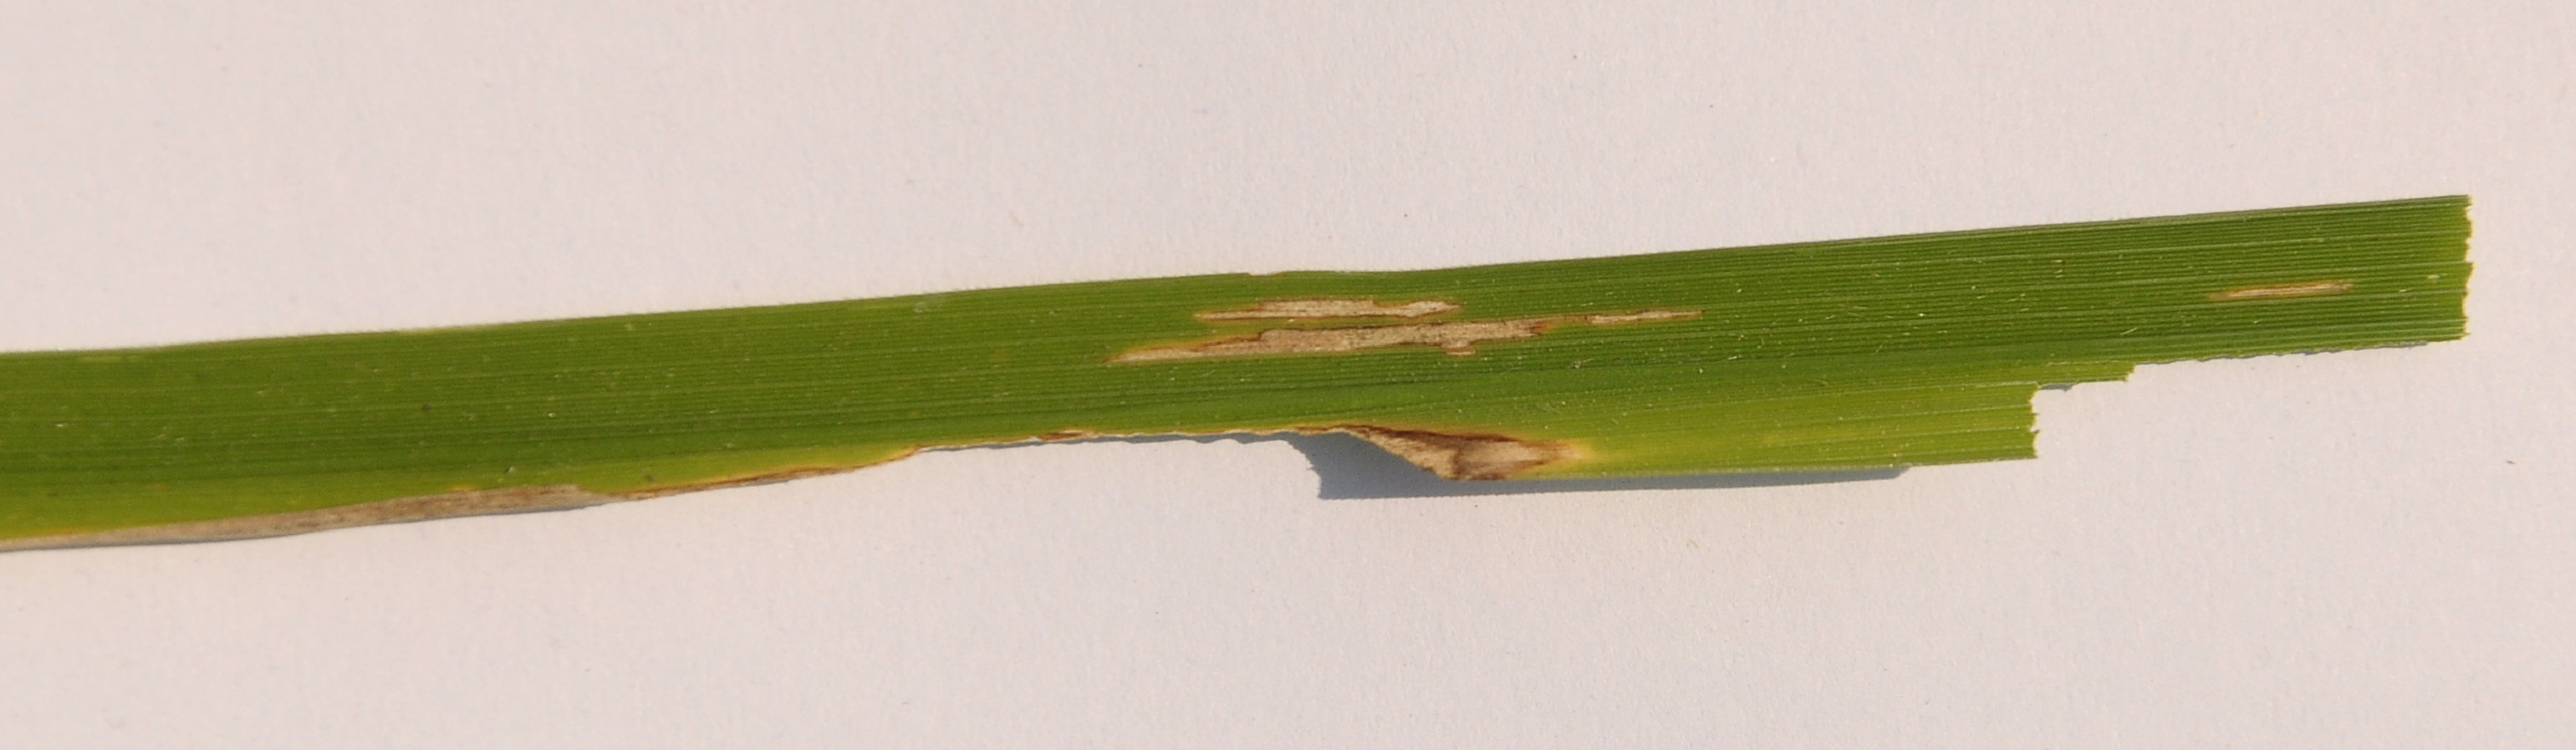

In [12]:
Image.open(str(bacterial_leaf_bright[0]))

In [13]:
Brown_spot = list(data.glob("Brown spot/*"))

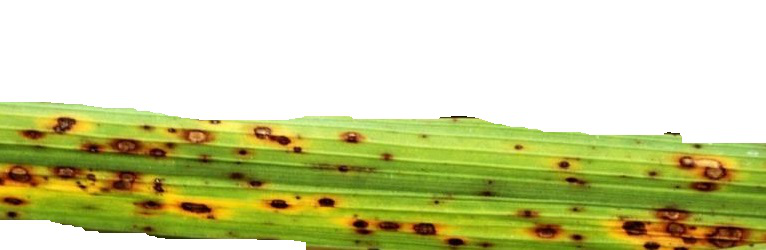

In [14]:
Image.open(str(Brown_spot[0]))

In [16]:
Leaf_smut = list(data.glob("Leaf smut/*"))

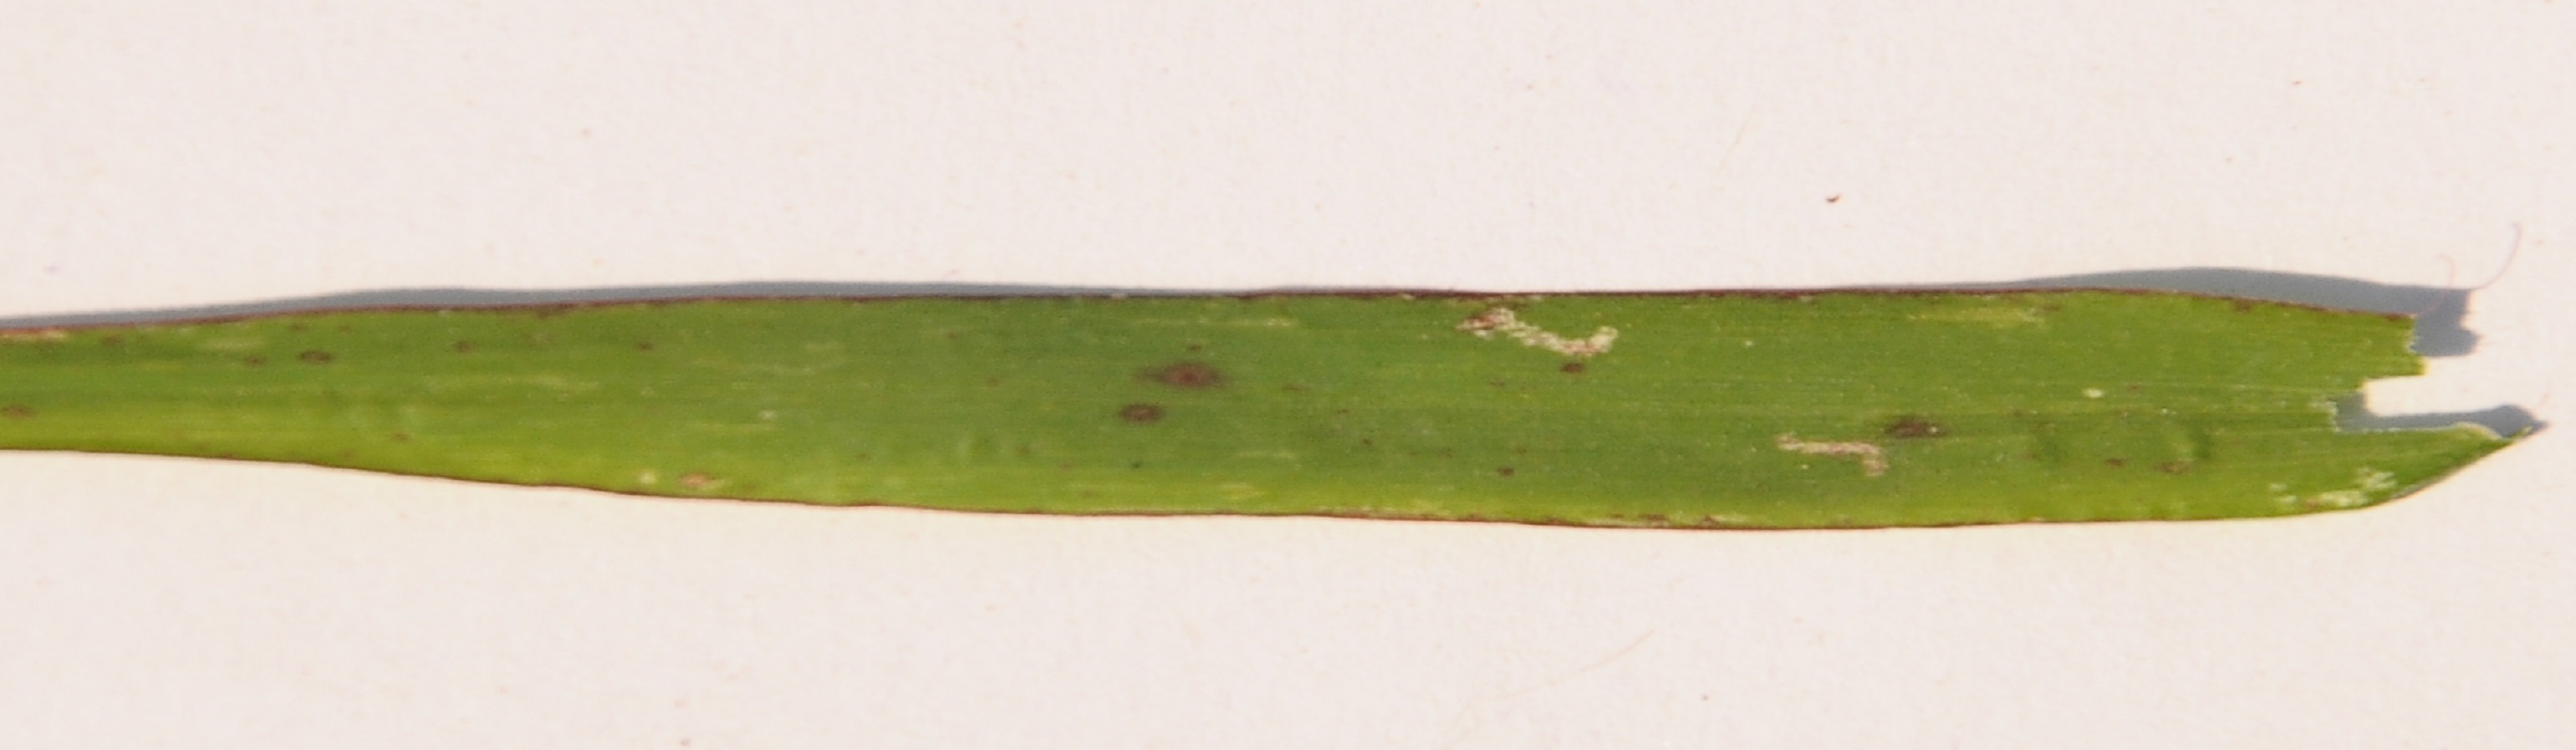

In [17]:
Image.open(str(Leaf_smut[0]))

In [13]:
leaf_image_dic={
    'bacterial_leaf_bright' : list(data.glob("Bacterial leaf blight/*")),
    'Brown_spot' :list(data.glob("Brown spot/*")),
    'Leaf_smut' : list(data.glob("Leaf smut/*"))
    
}

In [14]:
leaf_labels_dic={
    'bacterial_leaf_bright' : 0,
    'Brown_spot' :1,
    'Leaf_smut' : 2
}
    

In [19]:
x,y=[],[]
for leaf_name, images in leaf_image_dic.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(leaf_labels_dic[leaf_name])
        

In [22]:
x = np.array(x)
y = np.array(y)

In [23]:
x_scaled=x/255

In [24]:
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))

      # Compile the model
    model.compile(loss=loss_function,
                    optimizer=optimizer,
                    metrics=['accuracy'])
     # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1


NameError: name 'KFold' is not defined

In [28]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

NameError: name 'plt' is not defined